## Wooldridge (WOOL-DRIDGE)
- Interesting non-generic datasets
- Will typically include all necessary data points for the regression, adding further data is possible

In [1]:
from wooldridge import *

In [2]:
dataset_list = data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

In [22]:
df = data("prison", description = True)

name of dataset: prison
no of variables: 45
no of observations: 714

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| state    | alphabetical; DC = 9            |
| year     | 80 to 93                        |
| govelec  | =1 if gubernatorial election    |
| black    | proportion black                |
| metro    | proportion in metro. areas      |
| unem     | proportion unemployed           |
| criv     | viol. crimes per 100,000        |
| crip     | prop. crimes per 100,000        |
| lcriv    | log(criv)                       |
| lcrip    | log(crip)                       |
| gcriv    | lcriv - lcriv_1                 |
| gcrip    | lcrip - lcrip_1                 |
| y81      | =1 if year == 81                |
| y82      |                                 |
| y83      |                                 |
| y84      |                                 |
| y85      |                          

## Swiss Household Panel (SHP)

The Swiss Household Panel (SHP) is a long-term longitudinal study that surveys individuals and households in Switzerland every year. It collects detailed information on:

- Living conditions
- Income and employment
- Education and health
- Family and social relationships
- Values, politics, and well-being

Started in 1999, the SHP helps researchers analyze how Swiss residents' lives change over time. It's widely used in sociology, economics, demography, and public policy research.

The SHP is hosted by FORS (Swiss Centre of Expertise in the Social Sciences), and the data is available to researchers for free, under a user agreement.

Access to the SHP through: https://www.swissubase.ch/en/catalogue/search?q=swiss%20household%20panel&p=0&ps=10&sn=&sd=desc

### Working with SHP Label Files

The SHP data comes with STATA label files that contain:
- **Variable labels**: Descriptions of what each variable measures
- **Value labels**: Descriptions of what each coded value means

These labels are essential for understanding the data structure and working with the variables correctly.

### Loading and Parsing SHP Label Files


In [ ]:
import re
from pathlib import Path
from collections import defaultdict

def parse_stata_value_labels(label_file_path):
    """
    Parse STATA value label file and return a dictionary.
    
    Returns:
        dict: {pattern_name: {value: label, ...}, ...}
    """
    value_labels = {}
    current_pattern = None
    
    with open(label_file_path, 'r', encoding='latin-1') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
                
            # Match: label define pattern38D -8 "anderer Fehler", modify
            pattern_match = re.match(r'label define\s+(\w+)\s+(-?\d+)\s+"([^"]+)"', line)
            if pattern_match:
                pattern_name = pattern_match.group(1)
                value = int(pattern_match.group(2))
                label = pattern_match.group(3)
                
                if pattern_name not in value_labels:
                    value_labels[pattern_name] = {}
                value_labels[pattern_name][value] = label
    
    return value_labels

def parse_stata_variable_labels(label_file_path):
    """
    Parse STATA variable label file and return a dictionary.
    
    Returns:
        dict: {variable_name: label, ...}
    """
    variable_labels = {}
    
    with open(label_file_path, 'r', encoding='latin-1') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
                
            # Match: label variable varname "Variable Description"
            match = re.match(r'label variable\s+(\w+)\s+"([^"]+)"', line)
            if match:
                var_name = match.group(1)
                label = match.group(2)
                variable_labels[var_name] = label
    
    return variable_labels

def parse_stata_label_values(label_file_path):
    """
    Parse STATA label values file (assigns value labels to variables).
    
    Returns:
        dict: {variable_name: pattern_name, ...}
    """
    label_values = {}
    
    with open(label_file_path, 'r', encoding='latin-1') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
                
            # Match: label values VARNAME pattern38D
            match = re.match(r'label values\s+(\w+)\s+(\w+)', line)
            if match:
                var_name = match.group(1)
                pattern_name = match.group(2)
                label_values[var_name] = pattern_name
    
    return label_values

# Base path for label files
label_base_path = Path('/Users/fabianfacalbiemmi/Documents/ZHAW/02_Fächer/Empirical Methods in Economics/03_Project/swissubase_1149_2_0/Labels_STATA/W1/D')

# Parse all label files for W1
print("Loading STATA label files for Wave 1 (W1)...")

# Value labels
value_labels_h = parse_stata_value_labels(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_H_D.txt')
value_labels_p = parse_stata_value_labels(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_P_D.txt')
value_labels_x = parse_stata_value_labels(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_X_D.txt')

# Variable labels
var_labels_h = parse_stata_variable_labels(label_base_path / 'Variable_labels_SHP_IV_PILOT_W1_H_D.txt')
var_labels_p = parse_stata_variable_labels(label_base_path / 'Variable_labels_SHP_IV_PILOT_W1_P_D.txt')
var_labels_x = parse_stata_variable_labels(label_base_path / 'Variable_labels_SHP_IV_PILOT_W1_X_D.txt')

# Label value assignments (which pattern applies to which variable)
# Note: These are in the value label files at the end
label_assignments_h = parse_stata_label_values(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_H_D.txt')
label_assignments_p = parse_stata_label_values(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_P_D.txt')
label_assignments_x = parse_stata_label_values(label_base_path / 'Value_labels_SHP_IV_PILOT_W1_X_D.txt')

print(f"✓ Loaded value labels: H={len(value_labels_h)} patterns, P={len(value_labels_p)} patterns, X={len(value_labels_x)} patterns")
print(f"✓ Loaded variable labels: H={len(var_labels_h)} vars, P={len(var_labels_p)} vars, X={len(var_labels_x)} vars")
print(f"✓ Loaded label assignments: H={len(label_assignments_h)} vars, P={len(label_assignments_p)} vars, X={len(label_assignments_x)} vars")


### Example: Exploring Variable and Value Labels


In [ ]:
def get_variable_info(var_name, var_labels_dict, label_assignments_dict, value_labels_dict):
    """
    Get comprehensive information about a variable including its label and value labels.
    
    Returns:
        dict with 'variable_label', 'value_labels', 'pattern_name'
    """
    info = {
        'variable_label': var_labels_dict.get(var_name, 'Label not found'),
        'pattern_name': label_assignments_dict.get(var_name),
        'value_labels': None
    }
    
    if info['pattern_name']:
        # Combine all value label dictionaries to search for pattern
        all_value_labels = {**value_labels_dict}
        if info['pattern_name'] in all_value_labels:
            info['value_labels'] = all_value_labels[info['pattern_name']]
    
    return info

# Example 1: Explore a variable from the P-file (Person file)
example_var = 'sex17'  # Gender variable
print(f"Example 1: Variable '{example_var}'")
print("=" * 80)
info = get_variable_info(example_var, var_labels_p, label_assignments_p, value_labels_p)
print(f"Variable Label: {info['variable_label']}")
print(f"Pattern Name: {info['pattern_name']}")
if info['value_labels']:
    print(f"\nValue Labels:")
    for value, label in sorted(info['value_labels'].items()):
        print(f"  {value}: {label}")

print("\n" + "=" * 80 + "\n")

# Example 2: Explore a variable from the H-file (Household file)
example_var2 = 'h17h29'  # Housing ownership
print(f"Example 2: Variable '{example_var2}'")
print("=" * 80)
info2 = get_variable_info(example_var2, var_labels_h, label_assignments_h, value_labels_h)
print(f"Variable Label: {info2['variable_label']}")
print(f"Pattern Name: {info2['pattern_name']}")
if info2['value_labels']:
    print(f"\nValue Labels:")
    for value, label in sorted(info2['value_labels'].items()):
        print(f"  {value}: {label}")


### Creating a Label Dictionary for Easy Access

This function creates a comprehensive dictionary that maps variable names to their information.


In [ ]:
def create_label_dictionary(var_labels_dict, label_assignments_dict, value_labels_dict):
    """
    Create a comprehensive label dictionary for easy lookup.
    
    Returns:
        dict: {var_name: {'label': str, 'pattern': str, 'values': {value: label}}}
    """
    label_dict = {}
    
    # Combine all value label patterns
    all_patterns = value_labels_dict
    
    for var_name in var_labels_dict.keys():
        pattern_name = label_assignments_dict.get(var_name)
        label_dict[var_name] = {
            'label': var_labels_dict[var_name],
            'pattern': pattern_name,
            'values': all_patterns.get(pattern_name, {}) if pattern_name else {}
        }
    
    return label_dict

# Create comprehensive label dictionaries
labels_h = create_label_dictionary(var_labels_h, label_assignments_h, value_labels_h)
labels_p = create_label_dictionary(var_labels_p, label_assignments_p, value_labels_p)
labels_x = create_label_dictionary(var_labels_x, label_assignments_x, value_labels_x)

print(f"Created label dictionaries:")
print(f"  H-file: {len(labels_h)} variables")
print(f"  P-file: {len(labels_p)} variables")
print(f"  X-file: {len(labels_x)} variables")

# Example: Search for variables containing specific keywords
print("\n" + "=" * 80)
print("Example: Search for variables related to 'Einkommen' (income)")
print("=" * 80)
income_vars = [var for var in labels_p.keys() if 'einkommen' in labels_p[var]['label'].lower() or 'income' in var.lower()]
print(f"Found {len(income_vars)} variables:")
for var in income_vars[:10]:  # Show first 10
    print(f"  {var}: {labels_p[var]['label']}")


### Applying Labels to DataFrames

When working with SHP data in pandas, you can use these labels to:
1. Rename columns with descriptive labels
2. Map coded values to their labels for better readability
3. Create lookup functions for data exploration


In [ ]:
def apply_labels_to_dataframe(df, label_dict, rename_columns=True, decode_values=True):
    """
    Apply variable and value labels to a DataFrame.
    
    Parameters:
        df: pandas DataFrame
        label_dict: Dictionary with label information (from create_label_dictionary)
        rename_columns: If True, rename columns with variable labels
        decode_values: If True, create a copy with decoded values (as new columns)
    
    Returns:
        DataFrame with labels applied
    """
    df_labeled = df.copy()
    
    if rename_columns:
        # Create mapping: original_name -> label
        rename_map = {var: info['label'] for var, info in label_dict.items() if var in df.columns}
        df_labeled = df_labeled.rename(columns=rename_map)
    
    if decode_values:
        # For variables with value labels, create decoded versions
        # This would add new columns with decoded values
        # Note: This is a simplified version - in practice, you might want more control
        pass
    
    return df_labeled

def get_decoded_value(var_name, value, label_dict):
    """
    Get the label for a specific value of a variable.
    """
    if var_name in label_dict:
        values_dict = label_dict[var_name].get('values', {})
        return values_dict.get(value, f"Unknown ({value})")
    return f"No label found for {var_name}"

# Example usage (when you have loaded the data):
# df_p_labeled = apply_labels_to_dataframe(df_p, labels_p, rename_columns=True)

print("Label application functions created.")
print("\nExample: Get decoded value")
print(f"  Variable 'sex17', value 1: {get_decoded_value('sex17', 1, labels_p)}")
print(f"  Variable 'sex17', value 2: {get_decoded_value('sex17', 2, labels_p)}")


### Loading W2 Labels (Wave 2)

Similarly, you can load labels for Wave 2 data.


In [ ]:
# Load W2 labels
label_base_path_w2 = Path('/Users/fabianfacalbiemmi/Documents/ZHAW/02_Fächer/Empirical Methods in Economics/03_Project/swissubase_1149_2_0/Labels_STATA/W2/D')

print("Loading STATA label files for Wave 2 (W2)...")

# Value labels W2
value_labels_h_w2 = parse_stata_value_labels(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_H_D.txt')
value_labels_p_w2 = parse_stata_value_labels(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_P_D.txt')
value_labels_x_w2 = parse_stata_value_labels(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_X_D.txt')

# Variable labels W2
var_labels_h_w2 = parse_stata_variable_labels(label_base_path_w2 / 'Variable_labels_SHP_IV_PILOT_W2_H_D.txt')
var_labels_p_w2 = parse_stata_variable_labels(label_base_path_w2 / 'Variable_labels_SHP_IV_PILOT_W2_P_D.txt')
var_labels_x_w2 = parse_stata_variable_labels(label_base_path_w2 / 'Variable_labels_SHP_IV_PILOT_W2_X_D.txt')

# Label assignments W2
label_assignments_h_w2 = parse_stata_label_values(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_H_D.txt')
label_assignments_p_w2 = parse_stata_label_values(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_P_D.txt')
label_assignments_x_w2 = parse_stata_label_values(label_base_path_w2 / 'Value_labels_SHP_IV_PILOT_W2_X_D.txt')

# Create label dictionaries for W2
labels_h_w2 = create_label_dictionary(var_labels_h_w2, label_assignments_h_w2, value_labels_h_w2)
labels_p_w2 = create_label_dictionary(var_labels_p_w2, label_assignments_p_w2, value_labels_p_w2)
labels_x_w2 = create_label_dictionary(var_labels_x_w2, label_assignments_x_w2, value_labels_x_w2)

print(f"✓ Loaded W2 labels: H={len(labels_h_w2)} vars, P={len(labels_p_w2)} vars, X={len(labels_x_w2)} vars")


### Loading SHP Data Files (.dta)

Now we'll load the actual data files from STATA format (.dta files).


In [ ]:
import pandas as pd
import numpy as np

# Base path for data files
data_base_path = Path('/Users/fabianfacalbiemmi/Documents/ZHAW/02_Fächer/Empirical Methods in Economics/03_Project/swissubase_1149_2_0/SHP-IV-Pilot-Waves-1-2-STATA')

print("Loading SHP data files (Wave 1)...")
print("=" * 80)

# Load Wave 1 data files
data_path_w1 = data_base_path / 'W1'

# H-file (Household data)
df_h_w1 = pd.read_stata(data_path_w1 / 'shp17_iv_pilot_h_user.dta')
print(f"✓ Loaded H-file (Household): {df_h_w1.shape[0]} rows, {df_h_w1.shape[1]} columns")

# P-file (Person data)
df_p_w1 = pd.read_stata(data_path_w1 / 'shp17_iv_pilot_p_user.dta')
print(f"✓ Loaded P-file (Person): {df_p_w1.shape[0]} rows, {df_p_w1.shape[1]} columns")

# X-file (if available)
x_file_w1 = data_path_w1 / 'shp17_iv_pilot_x_user.dta'
if x_file_w1.exists():
    df_x_w1 = pd.read_stata(x_file_w1)
    print(f"✓ Loaded X-file: {df_x_w1.shape[0]} rows, {df_x_w1.shape[1]} columns")
    x_available_w1 = True
else:
    print("⚠ X-file not found for W1")
    df_x_w1 = None
    x_available_w1 = False

print("\n" + "=" * 80)
print("Loading SHP data files (Wave 2)...")
print("=" * 80)

# Load Wave 2 data files
data_path_w2 = data_base_path / 'W2'

# H-file (Household data)
df_h_w2 = pd.read_stata(data_path_w2 / 'shp18_iv_pilot_h_user.dta')
print(f"✓ Loaded H-file (Household): {df_h_w2.shape[0]} rows, {df_h_w2.shape[1]} columns")

# P-file (Person data)
df_p_w2 = pd.read_stata(data_path_w2 / 'shp18_iv_pilot_p_user.dta')
print(f"✓ Loaded P-file (Person): {df_p_w2.shape[0]} rows, {df_p_w2.shape[1]} columns")

# X-file (if available)
x_file_w2 = data_path_w2 / 'shp18_iv_pilot_x_user.dta'
if x_file_w2.exists():
    df_x_w2 = pd.read_stata(x_file_w2)
    print(f"✓ Loaded X-file: {df_x_w2.shape[0]} rows, {df_x_w2.shape[1]} columns")
    x_available_w2 = True
else:
    print("⚠ X-file not found for W2")
    df_x_w2 = None
    x_available_w2 = False

print("\n" + "=" * 80)
print("Data loading complete!")
print("=" * 80)


### Exploring the Loaded Data


In [ ]:
print("Wave 1 - Person File (P) Overview")
print("=" * 80)
print(f"Shape: {df_p_w1.shape}")
print(f"\nFirst few rows:")
print(df_p_w1.head())
print(f"\nColumn names (first 20):")
print(df_p_w1.columns.tolist()[:20])
print(f"\nData types:")
print(df_p_w1.dtypes.value_counts())


In [ ]:
print("Wave 1 - Household File (H) Overview")
print("=" * 80)
print(f"Shape: {df_h_w1.shape}")
print(f"\nFirst few rows:")
print(df_h_w1.head())
print(f"\nColumn names (first 20):")
print(df_h_w1.columns.tolist()[:20])


### Applying Labels to Explore Variables

Now let's use the labels we loaded earlier to understand what the variables mean.


In [ ]:
# Example: Explore a specific variable in the data
example_var = 'sex17'  # Gender

if example_var in df_p_w1.columns:
    print(f"Variable: {example_var}")
    print("=" * 80)
    
    # Get label information
    if example_var in labels_p:
        print(f"Label: {labels_p[example_var]['label']}")
        print(f"\nValue distribution:")
        value_counts = df_p_w1[example_var].value_counts().sort_index()
        
        # Show counts with labels if available
        for value, count in value_counts.items():
            label_text = labels_p[example_var]['values'].get(value, f"No label for {value}")
            print(f"  {value} ({label_text}): {count} ({count/len(df_p_w1)*100:.1f}%)")
    else:
        print("Label not found in dictionary")
        print(f"\nValue distribution:")
        print(df_p_w1[example_var].value_counts().sort_index())
else:
    print(f"Variable {example_var} not found in data")


In [ ]:
# Example: Explore a household variable
example_var_h = 'h17h29'  # Housing ownership

if example_var_h in df_h_w1.columns:
    print(f"Variable: {example_var_h}")
    print("=" * 80)
    
    # Get label information
    if example_var_h in labels_h:
        print(f"Label: {labels_h[example_var_h]['label']}")
        print(f"\nValue distribution:")
        value_counts = df_h_w1[example_var_h].value_counts().sort_index()
        
        # Show counts with labels if available
        for value, count in value_counts.items():
            label_text = labels_h[example_var_h]['values'].get(value, f"No label for {value}")
            print(f"  {value} ({label_text}): {count} ({count/len(df_h_w1)*100:.1f}%)")
    else:
        print("Label not found in dictionary")
        print(f"\nValue distribution:")
        print(df_h_w1[example_var_h].value_counts().sort_index())
else:
    print(f"Variable {example_var_h} not found in data")


### Finding Common ID Variables for Merging

To merge the Person (P) and Household (H) files, we need to identify the common ID variables.


In [ ]:
# Find ID variables (typically contain 'id' in the name)
id_vars_p = [col for col in df_p_w1.columns if 'id' in col.lower()]
id_vars_h = [col for col in df_h_w1.columns if 'id' in col.lower()]

print("ID variables in Person file (P):")
for var in id_vars_p:
    label = labels_p.get(var, {}).get('label', 'No label') if var in labels_p else 'No label'
    print(f"  {var}: {label}")

print("\nID variables in Household file (H):")
for var in id_vars_h:
    label = labels_h.get(var, {}).get('label', 'No label') if var in labels_h else 'No label'
    print(f"  {var}: {label}")

# Find common ID variables
common_ids = set(id_vars_p) & set(id_vars_h)
print(f"\nCommon ID variables: {list(common_ids)}")

# Most likely the household ID for merging
if 'idhous17' in common_ids or 'idhous17' in df_p_w1.columns:
    print("\nLikely merge key: idhous17 (Household ID)")


### Merging Person and Household Data

Let's merge the Person (P) and Household (H) files using the common ID variable.


In [ ]:
# Merge Person and Household data for Wave 1
merge_key = 'idhous17'  # Household ID

if merge_key in df_p_w1.columns and merge_key in df_h_w1.columns:
    # Merge dataframes
    df_merged_w1 = pd.merge(
        df_p_w1, 
        df_h_w1, 
        on=merge_key, 
        how='left',
        suffixes=('', '_h')
    )
    
    print(f"Merged dataset shape: {df_merged_w1.shape}")
    print(f"Original P-file shape: {df_p_w1.shape}")
    print(f"Original H-file shape: {df_h_w1.shape}")
    print(f"\nMerge successful! New columns: {df_merged_w1.shape[1] - df_p_w1.shape[1]}")
    
    # Check for duplicates in merge key
    if df_p_w1[merge_key].duplicated().any():
        print(f"\n⚠ Warning: Duplicate {merge_key} values in P-file")
    if df_h_w1[merge_key].duplicated().any():
        print(f"⚠ Warning: Duplicate {merge_key} values in H-file")
else:
    print(f"Merge key '{merge_key}' not found in both files")
    print(f"Available in P-file: {merge_key in df_p_w1.columns}")
    print(f"Available in H-file: {merge_key in df_h_w1.columns}")
    df_merged_w1 = None


### Summary: Data Loading Complete

✅ **Data Files Loaded:**
- Wave 1: Person (P), Household (H), and X (if available) files
- Wave 2: Person (P), Household (H), and X (if available) files

✅ **Labels Applied:**
- Variable labels: Descriptions of what each variable measures
- Value labels: Meanings of coded values
- Available for both W1 and W2

✅ **Next Steps:**
- Use `labels_p`, `labels_h`, `labels_x` to understand variable meanings
- Use `df_p_w1`, `df_h_w1`, `df_p_w2`, `df_h_w2` for data analysis
- Apply labels when exploring or visualizing data
- Merge datasets as needed for your analysis


### Summary: Working with SHP Labels

The label files provide essential metadata for understanding the SHP data:

1. **Variable Labels**: Human-readable descriptions of what each variable measures
2. **Value Labels**: Meaning of coded values (e.g., 1 = "ja", 2 = "nein")
3. **Pattern Assignments**: Which value label pattern applies to which variable

**Key Functions Created:**
- `parse_stata_value_labels()`: Parse value label definitions
- `parse_stata_variable_labels()`: Parse variable descriptions
- `parse_stata_label_values()`: Parse pattern assignments
- `create_label_dictionary()`: Create comprehensive lookup dictionary
- `get_variable_info()`: Get all information about a variable
- `get_decoded_value()`: Get label for a specific value

**Usage Tips:**
- Use labels to understand variable meanings before analysis
- Check value labels to identify missing codes (typically negative values: -1, -2, -3, etc.)
- Use variable labels for clearer plots and output
- Labels are available for both W1 and W2 data


## YFINANCE (YAHOO FINANCE)

yfinance is a Python library that allows users to easily download financial market data directly from Yahoo Finance.

✅ It’s great for:
- Stock prices (daily/weekly/monthly)
- ETF prices
- Index prices (e.g., S&P 500, Nasdaq)
- Some commodities and currencies (e.g., Gold = GC=F, EURUSD = EURUSD=X)
- Basic company info (market cap, P/E, etc.)
- Dividend and split history
- Financial statements (income, balance sheet, cash flow — basic)

❌ It’s not ideal for:
- Clean or detailed macroeconomic data (use FRED)
- Intraday data (limited and not always reliable)
- Deep fundamentals or analyst estimates (Ask for a Refinitiv license with the Finance Department at the ZHAW)

In [25]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [26]:
import yfinance as yf

In [28]:
# Download daily data for Nvidia (ticker: NVDA)
nvda_data = yf.download('NVDA', start='2020-01-01', end='2024-12-31')

# Extract just the closing prices
nvda_close = nvda_data['Close']

# Show first few rows
nvda_close.head()

[*********************100%***********************]  1 of 1 completed


Ticker,NVDA
Date,
2020-01-02,5.972161
2020-01-03,5.876571
2020-01-06,5.901216
2020-01-07,5.972659
2020-01-08,5.983862


<Axes: title={'center': 'Nvidia Closing Prices'}, xlabel='Date'>

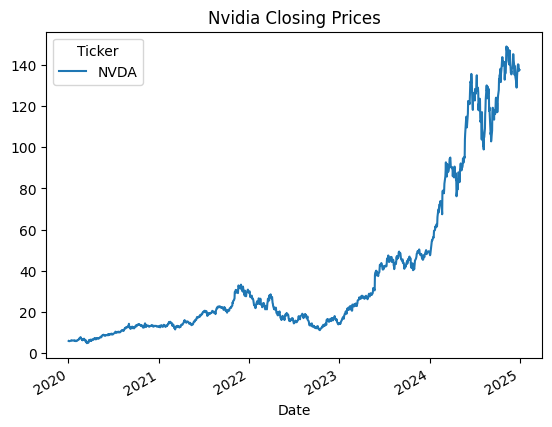

In [29]:
nvda_close.plot(title="Nvidia Closing Prices")

## FredAPI

The FRED API lets you access macroeconomic data from the Federal Reserve Bank of St. Louis (FRED) programmatically.

🔍 It's especially good for:
- Interest rates (e.g. Treasury yields)
- Inflation rates (e.g. CPI, PCE)
- Unemployment data
- GDP, industrial production, housing starts
- Money supply, credit data
- Historical, clean, and officially sourced datasets for the US economy

FRED is a go-to for macroeconomic analysis, policy modeling, time series regression, and forecasting.

In [30]:
!pip install fredapi

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

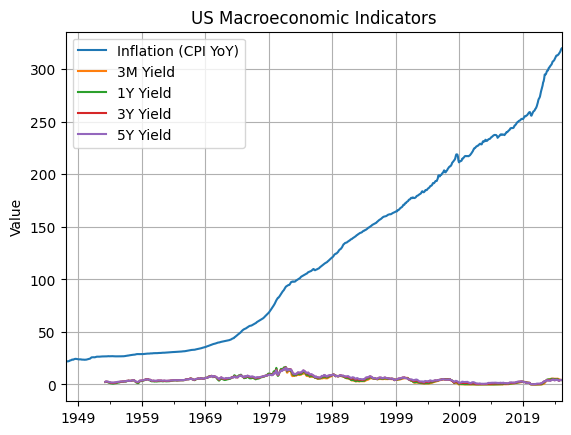

In [32]:
# Replace this with your own API key (register at https://fred.stlouisfed.org/)
fred = Fred(api_key='33ce4b5771cb0384ae20a9102dcf4ec4')

# Define series IDs for FRED
series_dict = {
    'Inflation (CPI YoY)': 'CPIAUCSL',
    '3M Yield': 'GS3M',
    '1Y Yield': 'GS1',
    '3Y Yield': 'GS3',
    '5Y Yield': 'GS5'
}

# Download data
data = {}
for label, series_id in series_dict.items():
    series = fred.get_series(series_id)
    data[label] = series

# Combine into DataFrame
df = pd.DataFrame(data)

# Plot
df.plot(title='US Macroeconomic Indicators')
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Kaggle

Kaggle is an online platform designed to help people learn, practice, and compete in data science and machine learning. It's owned by Google and widely used by students, professionals, and researchers alike.

✅ What is it good for?
- Learning & Training: Offers free tutorials, code notebooks, and mini-courses on topics like Python, machine learning, deep learning, and data visualization.
- Competitions: Hosts real-world data science challenges with cash prizes or rankings — great for building your portfolio.
- Datasets: A goldmine for finding interesting datasets on almost any topic (finance, healthcare, sports, economics, etc.). You can search, download, and use them for your own projects.
- Community & Sharing: You can view or fork others' code, get feedback, or share your own analysis through notebooks.

While Kaggle is beginner-friendly, you'll need to spend some time understanding the platform and looking for a dataset that you like. 

## Idea: Housing Prices Competition for Kaggle Learn Users

URL: https://www.kaggle.com/competitions/home-data-for-ml-course/data

- This is an introductory Kaggle competition designed to help students start practicing and appling statistical and machine learning techniques.
- Participants work with a dataset containing various features of residential homes, such as the number of bedrooms, square footage, and neighborhood information, to predict the sale prices of these homes.
- This competition serves as an excellent opportunity for those new to data science to gain hands-on experience in building models. So it is also ideal for our linear regressionary setup.

## Idea: Store Sales
URL: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data?select=test.csv

- This Kaggle competition challenges participants to predict sales for thousands of product families sold at Favorita stores in Ecuador.
- The dataset includes historical time-series data, providing an excellent opportunity to practice forecasting techniques.

## Idea: Russian Car Plates Prices Prediction
URL: https://www.kaggle.com/competitions/russian-car-plates-prices-prediction

- This Kaggle competition challenges participants to develop machine learning models that predict the market prices of Russian car license plates.
- Utilizing historical sales data from 2021 to 2025, sourced from aggregators such as Telegram channels and websites, participants can explore factors influencing plate valuations.
- This competition offers a unique opportunity to apply regression techniques and feature engineering to a niche dataset, enhancing skills in predictive modeling and data analysis. 

## Idea: Predict Future Sales
URL: https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data

- This Kaggle competition challenges participants to forecast total sales for every product and store in the next month using daily historical sales data.
- The dataset includes features such as date, store and product identifiers, item prices, and sales counts.